In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
para = "01-01-2024: Don't underestimate the roar of engines, the whiz of tires, and the grit of drivers pushing their limits. Formula One isn't just about speed; it's a complex dance of strategy, precision, and split-second decisions. From the mind-bending aerodynamics to the hair-raising pit stops, every detail matters. While crashes can be heart-stopping, victories ignite pure joy. So, buckle up, F1 fans, and let the adrenaline-pumping spectacle unfold! Written By: satyam@gmail.com, +911234567890, 01-January-2000."
print(para)

01-01-2024: Don't underestimate the roar of engines, the whiz of tires, and the grit of drivers pushing their limits. Formula One isn't just about speed; it's a complex dance of strategy, precision, and split-second decisions. From the mind-bending aerodynamics to the hair-raising pit stops, every detail matters. While crashes can be heart-stopping, victories ignite pure joy. So, buckle up, F1 fans, and let the adrenaline-pumping spectacle unfold! Written By: satyam@gmail.com, +911234567890, 01-January-2000.


In [3]:
# a) Count the number of unique tokens in the text
from nltk.tokenize import word_tokenize

tokens = word_tokenize(para)
unique_tokens = set(tokens)
print("Number of unique tokens:", len(unique_tokens))

Number of unique tokens: 71


In [4]:
# b) Count the number of punctuation characters and remove punctuations
import string

punctuation_count = sum(1 for char in para if char in string.punctuation)
print("Number of punctuation characters:", punctuation_count)

# Removing punctuations
para_without_punctuations = para.translate(str.maketrans('', '', string.punctuation))
print("Text without punctuations:", para_without_punctuations)


Number of punctuation characters: 35
Text without punctuations: 01012024 Dont underestimate the roar of engines the whiz of tires and the grit of drivers pushing their limits Formula One isnt just about speed its a complex dance of strategy precision and splitsecond decisions From the mindbending aerodynamics to the hairraising pit stops every detail matters While crashes can be heartstopping victories ignite pure joy So buckle up F1 fans and let the adrenalinepumping spectacle unfold Written By satyamgmailcom 911234567890 01January2000


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


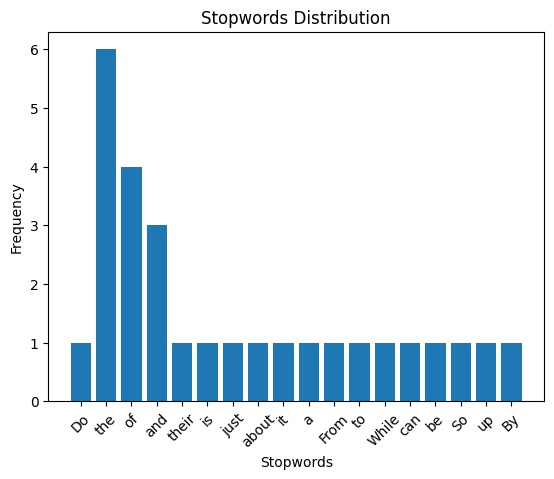

In [5]:
# c) Plot the distribution of stopwords used in the text using barplot

from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in tokens if word.lower() in stop_words]
word_freq = Counter(filtered_words)

plt.bar(word_freq.keys(), word_freq.values())
plt.xlabel('Stopwords')
plt.ylabel('Frequency')
plt.title('Stopwords Distribution')
plt.xticks(rotation=45)
plt.show()


In [6]:
# d) Remove the stopwords from the text
filtered_text = ' '.join([word for word in tokens if word.lower() not in stop_words])
print("Text without stopwords:", filtered_text)


Text without stopwords: 01-01-2024 : n't underestimate roar engines , whiz tires , grit drivers pushing limits . Formula One n't speed ; 's complex dance strategy , precision , split-second decisions . mind-bending aerodynamics hair-raising pit stops , every detail matters . crashes heart-stopping , victories ignite pure joy . , buckle , F1 fans , let adrenaline-pumping spectacle unfold ! Written : satyam @ gmail.com , +911234567890 , 01-January-2000 .


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


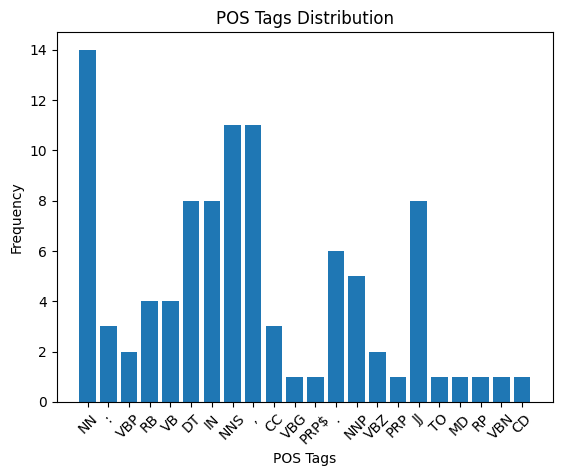

In [7]:
# e) Plot the distribution of each POS Tag using a barplot
nltk.download('averaged_perceptron_tagger')

pos_tags = nltk.pos_tag(tokens)
pos_counts = Counter(tag for word, tag in pos_tags)

plt.bar(pos_counts.keys(), pos_counts.values())
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('POS Tags Distribution')
plt.xticks(rotation=45)
plt.show()


In [8]:
# f) Determine the number of unique lemma available in the text
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(token) for token in tokens]
unique_lemmas = set(lemmas)
print("Number of unique lemmas:", len(unique_lemmas))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Number of unique lemmas: 71


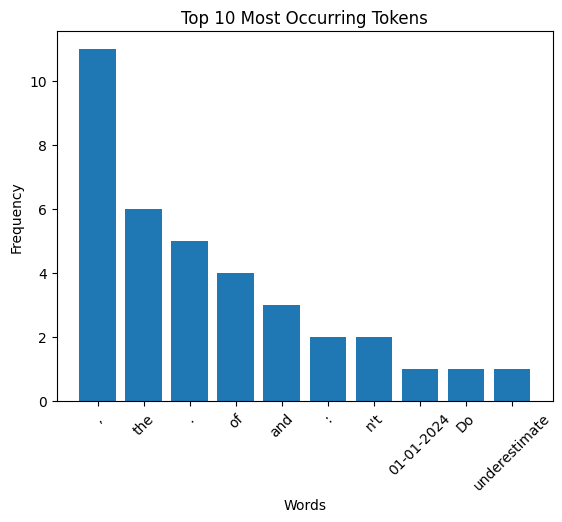

In [9]:
# g) Plot the frequency distribution of words in the text. Display only the top 10 (most occurring) tokens in the chart

word_freq = Counter(tokens)
top_10_tokens = dict(word_freq.most_common(10))

plt.bar(top_10_tokens.keys(), top_10_tokens.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Occurring Tokens')
plt.xticks(rotation=45)
plt.show()


In [10]:
# h) Find the number of unique bigrams, trigrams, and quadgrams (n=4) in the corpus

from nltk.util import ngrams

# Define functions to find n-grams
def find_ngrams(text, n):
    n_grams = ngrams(text.split(), n)
    return [' '.join(grams) for grams in n_grams]

# Generate n-grams
bigrams = find_ngrams(para, 2)
trigrams = find_ngrams(para, 3)
quadgrams = find_ngrams(para, 4)

# Count unique n-grams
unique_bigrams = set(bigrams)
unique_trigrams = set(trigrams)
unique_quadgrams = set(quadgrams)

print("Number of unique bigrams:", len(unique_bigrams))
print("Number of unique trigrams:", len(unique_trigrams))
print("Number of unique quadgrams:", len(unique_quadgrams))


Number of unique bigrams: 71
Number of unique trigrams: 70
Number of unique quadgrams: 69


In [11]:
# i) Find all dates and convert them to the DD-MM-YYYY format

import re

# Define regex pattern for dates
date_pattern = re.compile(r'\b(?:0?[1-9]|[12][0-9]|3[01])-(?:0?[1-9]|1[0-2])-(?:\d{4})\b')

# Find and replace dates
dates = date_pattern.findall(para)
formatted_dates = [date.replace('-', '/') for date in dates]

# Replace dates in the text and print year found and converted year
for date in dates:
    converted_date = date[-4:] + '-' + date[3:5] + '-' + date[:2]  # Convert DD-MM-YYYY to YYYY-MM-DD
    print("Year found:", date[-4:])
    print("Converted year:", converted_date)
    para = para.replace(date, converted_date)

print("Text with formatted dates:", para)


Year found: 2024
Converted year: 2024-01-01
Text with formatted dates: 2024-01-01: Don't underestimate the roar of engines, the whiz of tires, and the grit of drivers pushing their limits. Formula One isn't just about speed; it's a complex dance of strategy, precision, and split-second decisions. From the mind-bending aerodynamics to the hair-raising pit stops, every detail matters. While crashes can be heart-stopping, victories ignite pure joy. So, buckle up, F1 fans, and let the adrenaline-pumping spectacle unfold! Written By: satyam@gmail.com, +911234567890, 01-January-2000.


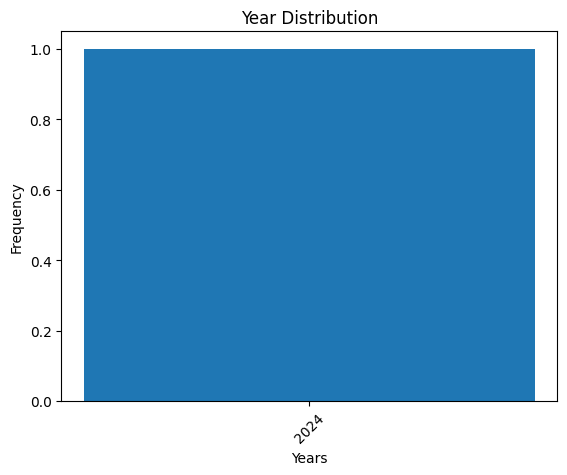

In [12]:
# j) Plot a distribution of the different values of the year occurring in the text

# Extract years from dates
years = [date.split('/')[-1] for date in formatted_dates]

# Count the frequency of each year
year_freq = Counter(years)

plt.bar(year_freq.keys(), year_freq.values())
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Year Distribution')
plt.xticks(rotation=45)
plt.show()


In [13]:
# k) Determine whether the text contains any phone numbers in it. Ensure the phone numbers are valid if any. If an invalid phone number is found, remove it from the text
!pip install phonenumbers

import phonenumbers

def find_phone_numbers(text):
    phone_numbers = []
    for match in phonenumbers.PhoneNumberMatcher(text, "US"):
        phone_numbers.append(phonenumbers.format_number(match.number, phonenumbers.PhoneNumberFormat.E164))
    return phone_numbers

phone_numbers = find_phone_numbers(para)

if phone_numbers:
    print("Phone numbers found:", phone_numbers)
    # Remove invalid phone numbers from the text
    for number in phone_numbers:
        if not phonenumbers.is_valid_number(phonenumbers.parse(number)):
            para = para.replace(number, '')
    print("Text with valid phone numbers:", para)
else:
    print("No phone numbers found in the text.")


Phone numbers found: ['+911234567890']
Text with valid phone numbers: 2024-01-01: Don't underestimate the roar of engines, the whiz of tires, and the grit of drivers pushing their limits. Formula One isn't just about speed; it's a complex dance of strategy, precision, and split-second decisions. From the mind-bending aerodynamics to the hair-raising pit stops, every detail matters. While crashes can be heart-stopping, victories ignite pure joy. So, buckle up, F1 fans, and let the adrenaline-pumping spectacle unfold! Written By: satyam@gmail.com, +911234567890, 01-January-2000.


### Insights and Possible Applications:

| Operation | Insight | Possible Applications |
|-----------|---------|-----------------------|
| a) Counting unique tokens | Vocabulary richness | Text summarization, sentiment analysis, topic modeling |
| b) Counting punctuation characters | Text preprocessing | Text classification, named entity recognition, machine translation |
| c) Plotting stopwords distribution | Commonly used words | Text summarization, keyword extraction, topic modeling |
| d) Removing stopwords | Noise reduction | Sentiment analysis, text classification, information retrieval |
| e) Plotting POS tag distribution | Grammatical structure | Named entity recognition, syntactic parsing, text generation |
| f) Counting unique lemmas | Reducing inflectional variations | Information retrieval, text classification, machine translation |
| g) Plotting word frequency distribution | Identifying frequent terms | Keyword extraction, topic modeling, content analysis |
| h) Counting unique n-grams | Identifying language patterns | Named entity recognition, text generation, machine translation |
| i) Finding and converting dates | Temporal normalization | Event extraction, temporal reasoning, text summarization |
| j) Plotting year distribution | Identifying temporal trends | Historical analysis, trend prediction, event detection |
| k) Finding and validating phone numbers | Contact information extraction | Customer support automation, fraud detection |
